# Sistema de recomendação para jogadores de futebol
### Projeto IACH - MECD (2022/2023)

In [84]:
import os
import numpy as np
import pandas as pd

### Read Data

In [85]:
pasta = "data"

def readData(fileName):
    dir = os.path.join(pasta, fileName)
    dfs = pd.read_excel(dir)

    dFrame = pd.DataFrame(dfs)
    display(dFrame)

    return [dfs, dFrame]

[data, dataFrame] = readData("FIFA22playersdataset.xlsx")

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


### Basic idea of initial dataset

In [86]:
dataFrame.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,lw,rw
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000,18913.000000,18913.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962,55.466187,55.466187
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563,14.676659,14.676659
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000,14.000000,14.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000,50.000000,50.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000,59.000000,59.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000,65.000000,65.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000,92.000000,92.000000


In [87]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: datetime64[ns](2), float64(18), int64(44), object(46)
memory usage: 16.1+ MB


In [88]:
dataFrame.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

### Data treatment

In [89]:
def dropColumns(data):
    data = data.drop(columns=["sofifa_id", "player_url", "club_team_id", "nationality_id", "nation_team_id", "nation_jersey_number", "real_face", "club_logo_url", "club_flag_url", "nation_logo_url", "nation_flag_url"])
    return data

def nullValues(data):
    data['club_name'] = data['club_name'].fillna('Free agent')
    data['league_name'] = data['league_name'].fillna('Free agent')
    data['club_loaned_from'] = data['club_loaned_from'].fillna('No loan')
    data = data.fillna(0)
    return data

dataframe_exp = dataFrame.copy()
dataFrame = dropColumns(dataFrame)
dataFrame = nullValues(dataFrame)


### Statiscal Analysis

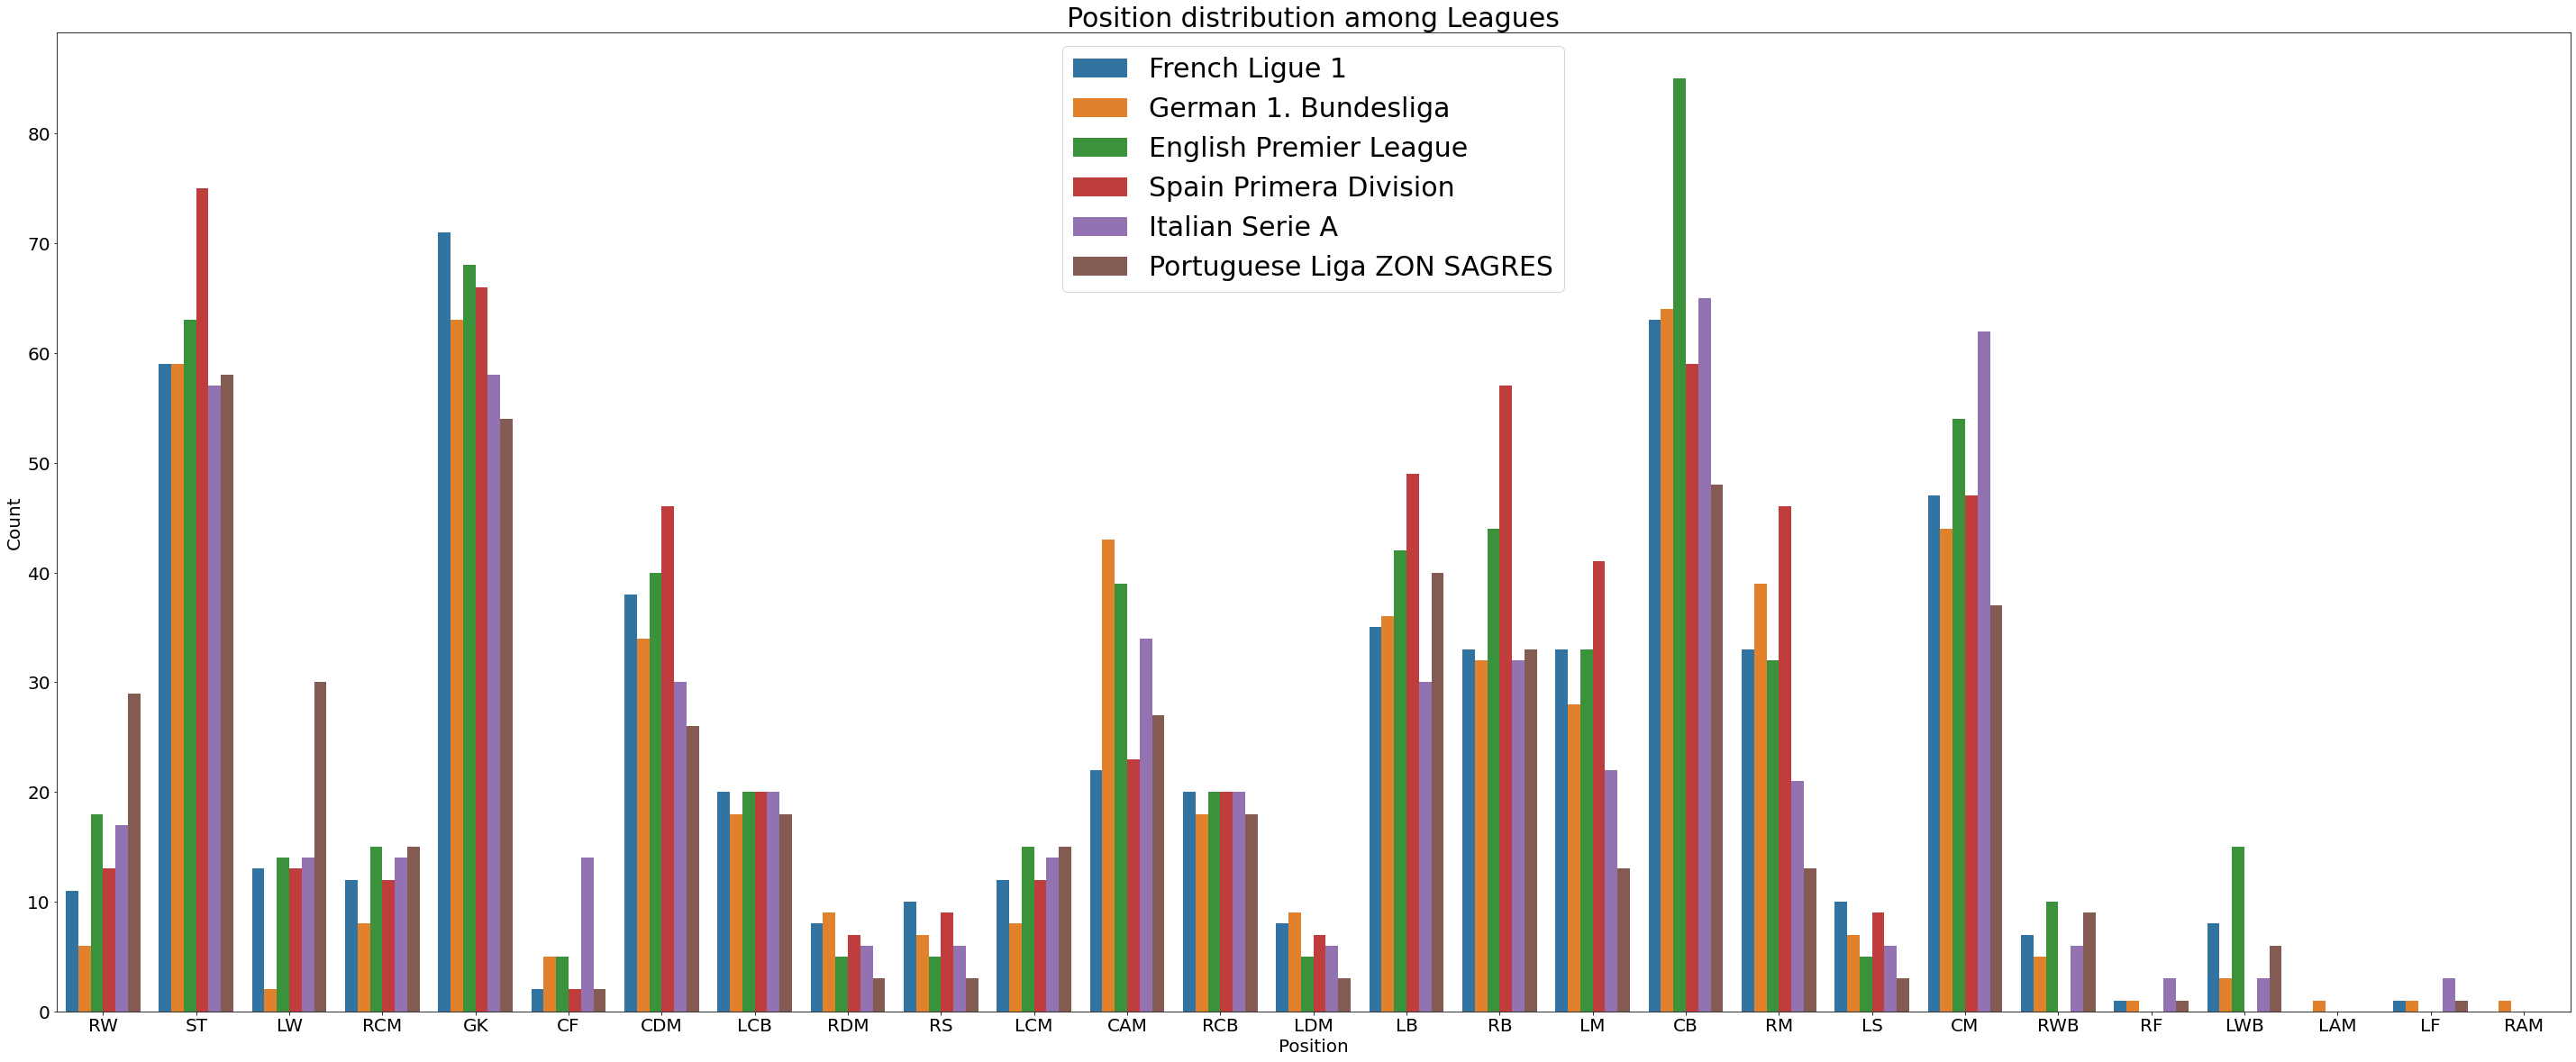

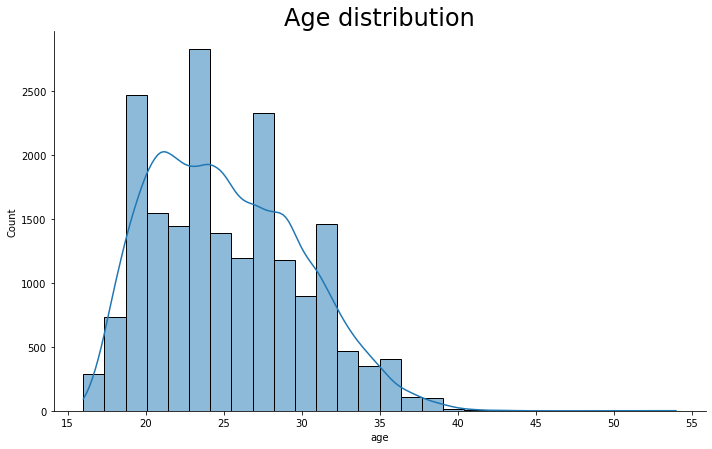

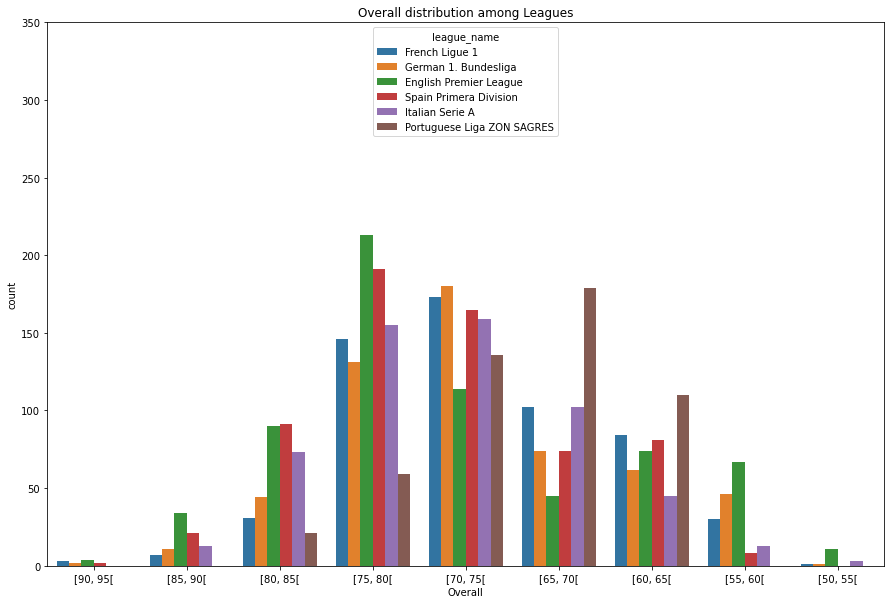

In [90]:
import seaborn as sns 
import matplotlib.pyplot as plt

def leagueDistribution(data):
    fig, _ = plt.subplots(figsize=(50,20))

    aux_data = pd.concat([data['league_name'], data['player_positions'].str.split(', ', expand=True)], axis = 1)

    data_aux = data.copy()
    data_aux.loc[data_aux['club_position'] == 'SUB', 'club_position'] = aux_data[0]
    data_aux.loc[data_aux['club_position'] == 'RES', 'club_position'] = aux_data[0]

    ax = sns.countplot(x='club_position', hue='league_name', data=data_aux)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    plt.legend(fontsize = 30)
    plt.xlabel('Position', fontsize = 20)
    plt.ylabel('Count', fontsize = 20)
    plt.title('Position distribution among Leagues', fontsize = 30)

def ageDistribution(data):
    sns.FacetGrid(data, height=6, aspect=10/6).map(sns.histplot, "age", bins = 28, kde = True)
    plt.title("Age distribution", size=24)
    plt.show()
    
    
def overallDistribution(data):
    data_aux = data.copy()
    data_aux.loc[data_aux['overall'].isin(np.arange(90, 95)), 'overall_interval'] = '[90, 95['
    data_aux.loc[data_aux['overall'].isin(np.arange(85, 90)), 'overall_interval'] = '[85, 90['
    data_aux.loc[data_aux['overall'].isin(np.arange(80, 85)), 'overall_interval'] = '[80, 85['
    data_aux.loc[data_aux['overall'].isin(np.arange(75, 80)), 'overall_interval'] = '[75, 80['
    data_aux.loc[data_aux['overall'].isin(np.arange(70, 75)), 'overall_interval'] = '[70, 75['
    data_aux.loc[data_aux['overall'].isin(np.arange(65, 70)), 'overall_interval'] = '[65, 70['
    data_aux.loc[data_aux['overall'].isin(np.arange(60, 65)), 'overall_interval'] = '[60, 65['
    data_aux.loc[data_aux['overall'].isin(np.arange(55, 60)), 'overall_interval'] = '[55, 60['
    data_aux.loc[data_aux['overall'].isin(np.arange(50, 55)), 'overall_interval'] = '[50, 55['
    

    fig, _ = plt.subplots(figsize=(15,10))
    ax = sns.countplot(x='overall_interval', hue='league_name', data=data_aux)
    ax.set_ylim(0, 350)
    plt.xlabel('Overall')
    plt.title('Overall distribution among Leagues')

distributionDF = dataFrame[dataFrame['league_name'].isin(["French Ligue 1", "German 1. Bundesliga", "English Premier League", "Spain Primera Division", "Italian Serie A", "Portuguese Liga ZON SAGRES"])]

leagueDistribution(distributionDF)
ageDistribution(dataFrame)
overallDistribution(distributionDF)



### Continue preparing data

In [91]:
def posi(data):
    data['player_positions']=data['player_positions'].str.replace(',','')
    for idx in range(len(data)):
        if (data['club_position'][idx] != 0) and (data['club_position'][idx] not in data['player_positions'][idx]):
            if(data['club_position'][idx] != 'RES' and data['club_position'][idx] != 'SUB'):
                aux = data['player_positions'][idx] + ' ' + data['club_position'][idx]
                data.loc[idx,'player_positions'] = aux

    return data.drop(columns='club_position')

def posi_nac(data):
    for idx in range(len(data)):
        if (data['nation_position'][idx] != 0) and (data['nation_position'][idx] not in data['player_positions'][idx]):
            if(data['nation_position'][idx] != 'SUB'):
                aux = data['player_positions'][idx] + ' ' + data['nation_position'][idx]
                data.loc[idx,'player_positions'] = aux

    return data.drop(columns='nation_position')

def calculate_final_value(data):
    lista = ["ls", "st", "rs", "lf", "cf", "rf", "lam", "cam", "ram", "lm", "lcm", "cm", "rcm", "rm", "lwb", "ldm", "cdm", "rdm", "rwb", "lb", "lcb", "cb", "rcb", "rb", "gk"]
    for idx in range(len(data)):
        for stats in lista:
            if ("-" in str(data[stats][idx])):
                values = data[stats][idx].split("-")
                aux = float(values[0]) - float(values[1])
                data.loc[idx,stats] = aux
            if ("+" in str(data[stats][idx])):
                values = data[stats][idx].split("+")
                aux = float(values[0]) + float(values[1])
                data.loc[idx,stats] = aux

    return data


dataFrame = posi(dataFrame)
dataFrame = posi_nac(dataFrame)
calculate_final_value(dataFrame)									

display(dataFrame)

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,L. Messi,Lionel Andrés Messi Cuccittini,RW ST CF,93,93,78000000.0,320000.0,34,1987-06-24,170,...,67.0,67.0,69.0,64.0,53.0,53.0,53.0,64.0,22.0,https://cdn.sofifa.net/players/158/023/22_120.png
1,R. Lewandowski,Robert Lewandowski,ST RS,92,92,119500000.0,270000.0,32,1988-08-21,185,...,69.0,69.0,67.0,64.0,63.0,63.0,63.0,64.0,22.0,https://cdn.sofifa.net/players/188/545/22_120.png
2,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,ST LW,91,91,45000000.0,270000.0,36,1985-02-05,187,...,62.0,62.0,66.0,63.0,56.0,56.0,56.0,63.0,23.0,https://cdn.sofifa.net/players/020/801/22_120.png
3,Neymar Jr,Neymar da Silva Santos Júnior,LW CAM,91,91,129000000.0,270000.0,29,1992-02-05,175,...,66.0,66.0,70.0,65.0,53.0,53.0,53.0,65.0,23.0,https://cdn.sofifa.net/players/190/871/22_120.png
4,K. De Bruyne,Kevin De Bruyne,CM CAM RCM,91,91,125500000.0,350000.0,30,1991-06-28,181,...,83.0,83.0,82.0,78.0,72.0,72.0,72.0,78.0,24.0,https://cdn.sofifa.net/players/192/985/22_120.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,1999-01-02,180,...,48.0,48.0,50.0,50.0,48.0,48.0,48.0,50.0,17.0,https://cdn.sofifa.net/players/261/962/22_120.png
19235,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,2002-03-18,175,...,48.0,48.0,51.0,50.0,46.0,46.0,46.0,50.0,16.0,https://cdn.sofifa.net/players/262/040/22_120.png
19236,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,2000-02-07,178,...,48.0,48.0,49.0,49.0,47.0,47.0,47.0,49.0,14.0,https://cdn.sofifa.net/players/262/760/22_120.png
19237,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,2002-04-23,173,...,31.0,31.0,35.0,34.0,28.0,28.0,28.0,34.0,17.0,https://cdn.sofifa.net/players/262/820/22_120.png


In [92]:
def repeatedNames(dataFrame):
    newID = []

    for idx in range(len(dataFrame)):
        newID.append(dataFrame['short_name'][idx] + ' ({}, {})'.format(dataFrame['club_name'][idx], str(int(dataFrame['club_jersey_number'][idx]))))

    dataframe_exp["CompareID"] = newID

    player_ID = dict(zip(newID, np.arange(len(newID))))

    return player_ID, newID

player_ID, newID = repeatedNames(dataFrame)


def dropColumnsToCompare(data):
    dataToCompv = data.drop(columns=["club_jersey_number", "long_name", "value_eur", "wage_eur", "age", "dob", "club_name", "league_name", "league_level", "club_loaned_from", "club_joined", "club_contract_valid_until", "nationality_name", "release_clause_eur", "player_face_url", "international_reputation"])
    return dataToCompv


dataToComp = dropColumnsToCompare(dataFrame)
display(dataToComp)


,short_name,player_positions,overall,potential,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,work_rate,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,RW ST CF,93,93,170,72,Left,4,4,Medium/Low,...,67.0,67.0,67.0,69.0,64.0,53.0,53.0,53.0,64.0,22.0
1,R. Lewandowski,ST RS,92,92,185,81,Right,4,4,High/Medium,...,69.0,69.0,69.0,67.0,64.0,63.0,63.0,63.0,64.0,22.0
2,Cristiano Ronaldo,ST LW,91,91,187,83,Right,4,5,High/Low,...,62.0,62.0,62.0,66.0,63.0,56.0,56.0,56.0,63.0,23.0
3,Neymar Jr,LW CAM,91,91,175,68,Right,5,5,High/Medium,...,66.0,66.0,66.0,70.0,65.0,53.0,53.0,53.0,65.0,23.0
4,K. De Bruyne,CM CAM RCM,91,91,181,70,Right,5,4,High/High,...,83.0,83.0,83.0,82.0,78.0,72.0,72.0,72.0,78.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,CDM,47,52,180,64,Right,3,2,Medium/Medium,...,48.0,48.0,48.0,50.0,50.0,48.0,48.0,48.0,50.0,17.0
19235,C. Porter,CM,47,59,175,70,Right,3,2,Medium/Medium,...,48.0,48.0,48.0,51.0,50.0,46.0,46.0,46.0,50.0,16.0
19236,N. Logue,CM,47,55,178,72,Right,3,2,Medium/Medium,...,48.0,48.0,48.0,49.0,49.0,47.0,47.0,47.0,49.0,14.0
19237,L. Rudden,ST,47,60,173,66,Right,3,2,Medium/Medium,...,31.0,31.0,31.0,35.0,34.0,28.0,28.0,28.0,34.0,17.0


### Basic idea for final dataset

In [93]:
dataToComp.describe()

,overall,potential,height_cm,weight_kg,weak_foot,skill_moves,pace,shooting,passing,dribbling,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,lw,rw
count,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000
mean,65.772182,71.079370,181.299704,74.943032,2.946151,2.352461,60.653932,46.544571,50.961381,55.628359,...,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,4.038152,54.526327,54.526327
std,6.880232,6.086213,6.863179,7.069434,0.671560,0.767659,23.765567,21.108595,20.342818,21.645002,...,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,11.985610,16.217397,16.217397
min,47.000000,49.000000,155.000000,49.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,61.000000,67.000000,176.000000,70.000000,3.000000,2.000000,58.000000,35.000000,47.000000,53.000000,...,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,49.000000,49.000000
50%,66.000000,71.000000,181.000000,75.000000,3.000000,2.000000,67.000000,52.000000,56.000000,62.000000,...,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,0.000000,59.000000,59.000000
75%,70.000000,75.000000,186.000000,80.000000,3.000000,3.000000,75.000000,62.000000,63.000000,68.000000,...,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,0.000000,65.000000,65.000000
max,93.000000,95.000000,206.000000,110.000000,5.000000,5.000000,97.000000,94.000000,93.000000,95.000000,...,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000,92.000000,92.000000


In [94]:
dataToComp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 81 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   19239 non-null  object 
 1   player_positions             19239 non-null  object 
 2   overall                      19239 non-null  int64  
 3   potential                    19239 non-null  int64  
 4   height_cm                    19239 non-null  int64  
 5   weight_kg                    19239 non-null  int64  
 6   preferred_foot               19239 non-null  object 
 7   weak_foot                    19239 non-null  int64  
 8   skill_moves                  19239 non-null  int64  
 9   work_rate                    19239 non-null  object 
 10  body_type                    19239 non-null  object 
 11  player_tags                  19239 non-null  object 
 12  player_traits                19239 non-null  object 
 13  pace            

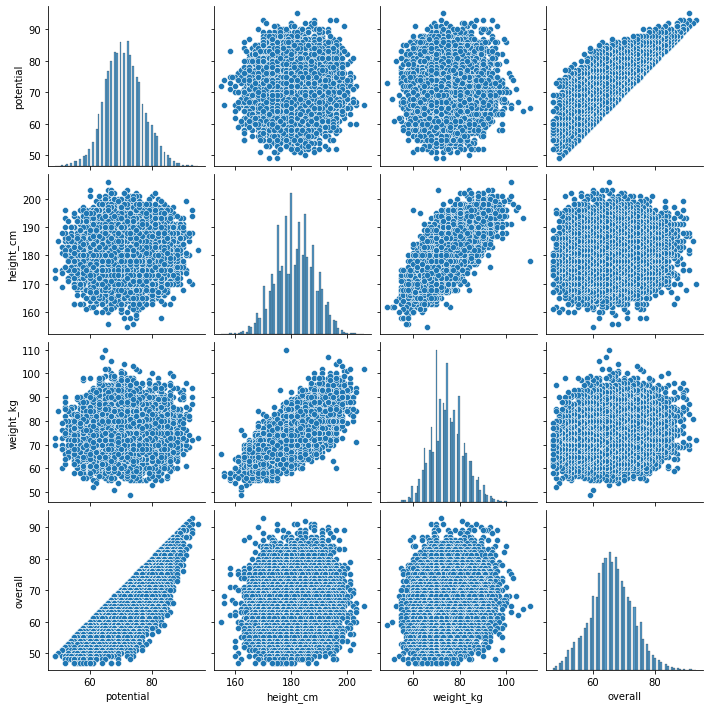

In [95]:
X_columns = ['potential', 'height_cm', 'weight_kg', 'overall']
sns.pairplot(dataToComp[X_columns])

In [96]:
columns = np.arange(2, 6)
columns = np.append(columns, np.arange(7, 9))
columns = np.append(columns, np.arange(13, 81))
stats = dataToComp.iloc[:, columns]

#stats = stats.iloc[0:100, :]


### PCA

Text(0.5, 1.0, 'PCA: components selection')

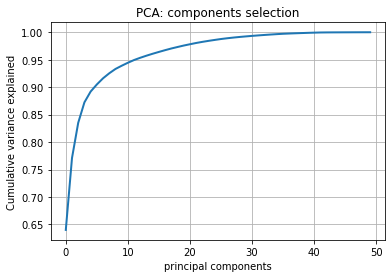

In [97]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

# standardizing the data
data = StandardScaler().fit_transform(stats)
# setting up and running PCA
pca = decomposition.PCA()
pca.n_components = 50
pca_data = pca.fit_transform(data)

# % variance explained per components
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

# cumulative variance explained
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(6, 4))
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('principal components')
plt.ylabel('Cumulative variance explained')
plt.title('PCA: components selection')

In [ ]:
from scipy.spatial import distance
from tqdm import tqdm
import pickle

# fetch the player vector
def getStats(name):
    idx = player_ID[name]
    return stats.iloc[idx]

# fetch cosine similarity between two player vectors
def similarity(player1, player2):
    return 1 - distance.cosine(getStats(player1), getStats(player2))

# normalize an array to a scale of 0 to 1
def normalize(array):
    return np.array([round(num, 2) for num in (array - min(array))*100/(max(array)-min(array))])

# player-similarities hash table
engine = {}
for query in tqdm(newID[0:5772]):
    metric = []
    for player in newID[0:5772]:
        value = similarity(query, player)
        metric.append(value)
    metric = normalize(metric)
    # adding normalized similarity values to the 'player name' key
    engine[query] = metric

# saving hash table/dict as a pickle
with open(r'data\engine.pickle', 'wb') as file:
    pickle.dump(engine, file)

In [98]:
with open('data\engine.pickle', 'rb') as f:
    engine = pickle.load(f)

### Input to get Recommendations

In [99]:
print("Welcome to the Best Autoexplicative Football Players Recommendation System!")
print("Let's first check which leagues we have available.")
leagues = dataFrame["league_name"].drop_duplicates()
display(pd.DataFrame(leagues.values))

print("Which league does the player play in? (if none, write 'Free agent')")

league = ""
while (league == ""):
    league = input("League: ")
    if league not in leagues.values:
        print("Invalid league! Try again.")
        league = ""

if league != "Free agent":
    print("Which team does he play for?")

    teams = dataFrame[dataFrame["league_name"] == league]
    display(pd.DataFrame(teams["club_name"].drop_duplicates().values))
    team = ""

    while team == "":
        team = input("Team: ")
        if team not in teams["club_name"].drop_duplicates().values:
            print("Invalid team! Try again.")
            team = ""
else:
    team = league

print("------- Players from " + team + "-------")
players = dataFrame[dataFrame["club_name"] == team]
display(players[["short_name", "club_jersey_number"]])

print("Now, tell us which player you want to compare:")

name = ""
while name == "":
    name = input("Name: ")
    if name not in list(players["short_name"].values):
        print("Invalid player! Try again.")
        name = ""

number = players[players["short_name"] == name]["club_jersey_number"]
number = str(int(float(number)))



Welcome to the Best Autoexplicative Football Players Recommendation System!
Let's first check which leagues we have available.


,0
0,French Ligue 1
1,German 1. Bundesliga
2,English Premier League
3,Spain Primera Division
4,Italian Serie A
5,Holland Eredivisie
6,USA Major League Soccer
7,Free agent
8,Saudi Abdul L. Jameel League
9,Portuguese Liga ZON SAGRES


Which league does the player play in? (if none, write 'Free agent')
Which team does he play for?


,0
0,Sporting CP
1,FC Porto
2,SL Benfica
3,SC Braga
4,Vitória de Guimarães
5,Portimonense SC
6,FC Paços de Ferreira
7,Moreirense FC
8,Clube Sport Marítimo
9,Gil Vicente FC


------- Players from SL Benfica-------


,short_name,club_jersey_number
239,Grimaldo,3.0
248,Rafa,27.0
293,J. Vertonghen,5.0
302,N. Otamendi,30.0
308,Pizzi,21.0
343,O. Vlachodimos,99.0
451,João Mário,20.0
465,Everton,7.0
606,J. Weigl,28.0
641,Lucas Veríssimo,4.0


Now, tell us which player you want to compare:


### Get Recommendations

In [102]:
def getRecommendations(metric, age, foot, workrate, league, count=10):

    df_res = dataFrame.iloc[0:5772, [0, 2, 3, 7, 12, 19, 20, 23, 24, 26]].copy()

    list_player_ID = list(player_ID.keys())
    list_player_ID = list_player_ID[0:5772]
    df_res['short_name'] = list_player_ID
    df_res.insert(1, 'Similarity', metric)
    df_res = df_res.sort_values(by=['Similarity'], ascending=False)
    metric = [str(np.round(num/100, 4)) for num in df_res['Similarity']]
    df_res['Similarity'] = metric
    # ignoring the top result

    display(pd.DataFrame(df_res.iloc[0, :]))

    df_res = df_res.iloc[1:, :]
    
    # age filtering
    if age=='All':
        pass
    else:
        df_res = df_res[(df_res['age'] >= age[0]) & (df_res['age'] <= age[1])]

    
    # preferred foot filtering
    if foot=='All':
        pass
    elif foot=='Left':
        df_res = df_res[df_res['preferred_foot']=='Left']
    else:
        df_res = df_res[df_res['preferred_foot']=='Right']

    # league filtering
    if league=='All':
        pass
    else:
        df_res = df_res[df_res['league_name']==league]
    

    # work rate filtering
    if workrate=='All' or workrate == 'Low/Low':
        pass
    elif workrate == 'Low/Medium':
        df_res = df_res[(df_res['work_rate']=="Low/Medium") | (df_res['work_rate']=="Low/High") | (df_res['work_rate']=="Medium/Medium") | (df_res['work_rate']=="Medium/High") | (df_res['work_rate']=="High/Medium") | (df_res['work_rate']=="High/High")]
    elif workrate == 'Low/High':
        df_res = df_res[(df_res['work_rate']=="Low/High") | (df_res['work_rate']=="Medium/High") |  (df_res['work_rate']=="High/High")]
    elif workrate == 'Medium/Low':
        df_res = df_res[(df_res['work_rate']=="Medium/Low") |(df_res['work_rate']=="Medium/Medium") | (df_res['work_rate']=="Medium/High") | (df_res['work_rate']=="High/Low") | (df_res['work_rate']=="High/Medium") | (df_res['work_rate']=="High/High")]
    elif workrate == 'Medium/Medium':
        df_res = df_res[(df_res['work_rate']=="Medium/Medium") | (df_res['work_rate']=="Medium/High") | (df_res['work_rate']=="High/Medium") | (df_res['work_rate']=="High/High")]
    elif workrate == 'Medium/High':
        df_res = df_res[(df_res['work_rate']=="Medium/High") | (df_res['work_rate']=="High/High")]
    elif workrate == 'High/Low':
        df_res = df_res[(df_res['work_rate']=="High/Low") | (df_res['work_rate']=="High/Medium") | (df_res['work_rate']=="High/High")]
    elif workrate == 'High/Medium':
        df_res = df_res[(df_res['work_rate']=="High/Medium") | (df_res['work_rate']=="High/High")]
    elif workrate == 'High/High':
        df_res = df_res[(df_res['work_rate']=="High/High")]
    
    # returning the final result
    df_res = df_res.iloc[:count, :].reset_index(drop=True)
    df_res.index = df_res.index + 1
    
    df_res.rename(columns={'player_positions':'Position', 'player_traits':'Traits'}, inplace=True)
    return df_res

query = name + " (" + team + ", " + number + ")"
age_default = 'All'
foot = 'All'
league = 'All'
workrate = 'All'
tag = '#Distance Shooter'
sims = engine[query]
recoms = getRecommendations(sims, age_default, foot, workrate, league)
# displaying result as a table
display(recoms)
#st.table(recoms)

,3808
short_name,"Gonçalo Ramos (SL Benfica, 88)"
Similarity,1.0
player_positions,CF ST
overall,72
age,20
league_name,Portuguese Liga ZON SAGRES
preferred_foot,Right
weak_foot,4
work_rate,High/High
body_type,Normal (170-185)


,short_name,Similarity,Position,overall,age,league_name,preferred_foot,weak_foot,work_rate,body_type,player_tags
1,"J. Ebobisse (San Jose Earthquakes, 11)",0.9962,ST RM,71,24,USA Major League Soccer,Left,4,High/High,Normal (170-185),0
2,"J. Kuchta (SK Slavia Praha, 16)",0.9932,ST,75,24,Czech Republic Gambrinus Liga,Right,3,High/High,Normal (170-185),0
3,"T. Awoniyi (1. FC Union Berlin, 14)",0.993,ST RW RS,74,23,German 1. Bundesliga,Right,2,High/Medium,Stocky (170-185),0
4,"C. Ekuban (Genoa, 20)",0.9928,RM CAM ST,75,27,Italian Serie A,Right,3,High/Medium,Normal (170-185),0
5,"C. Kühlwetter (1. FC Heidenheim 1846, 24)",0.9927,ST RM LM RS,70,25,German 2. Bundesliga,Right,3,High/Medium,Normal (170-185),0
6,"V. Osimhen (Napoli, 9)",0.9925,ST,80,22,Italian Serie A,Right,4,High/Medium,Lean (185+),0
7,"R. Boženík (Fortuna Düsseldorf, 32)",0.9923,ST,70,21,German 2. Bundesliga,Right,3,High/Medium,Normal (185+),0
8,"H. Martín (Club América, 21)",0.9923,ST RS,76,28,Mexican Liga MX,Right,3,High/Medium,Stocky (170-185),0
9,"N. Moumi Ngamaleu (BSC Young Boys, 13)",0.9919,LM RM,74,26,Swiss Super League,Right,3,Medium/Medium,Normal (170-185),#Speedster
10,"V. Berisha (Viking FK, 14)",0.9917,ST,70,27,Norwegian Eliteserien,Right,3,High/Medium,Stocky (170-185),0


### Explanations

In [103]:
import datetime

compared = dataframe_exp[dataframe_exp["CompareID"] == query]
year = str(datetime.date.today())
year = int(year.split("-")[0])

pos_compared = dataframe_exp[dataframe_exp["CompareID"] == query].index

total_stats = stats.shape[1]

for v in recoms.values:
    print("-------------- " + v[0] + " --------------")
    print("")
    x = dataframe_exp[dataframe_exp["CompareID"] == v[0]]
    pos_x = dataframe_exp[dataframe_exp["CompareID"] == v[0]].index

    stats_com = ""
    stats_dif = ""

    stats_com_flag = 0
    stats_dif_flag = 0

    stats_equal = 0
    stats_noEqual = 0

    for s in stats: 

        if abs(stats[s].iloc[pos_compared].values[0] - stats[s].iloc[pos_x].values[0]) <= 6:
            stats_equal += 1
            if stats_com_flag == 0:
                stats_com += s
                stats_com_flag = 1
            else:
                stats_com += ", " + s
        
        elif abs(stats[s].iloc[pos_compared].values[0] - stats[s].iloc[pos_x].values[0]) > 15:
            stats_noEqual += 1
            if stats_dif_flag == 0:
                stats_dif += s
                stats_dif_flag = 1
            else:
                stats_dif += ", " + s


    if stats_com_flag:
        print("He is being recommended because " + compared["short_name"].values[0] +  " has similar grades at: " + stats_com)
    print("")
    if stats_dif_flag:
        print("However, " + x["short_name"].values[0] +  " has great differences at: " + stats_dif)
    print("")


    print("The player " + x["short_name"].values[0] + " has a percentage of similarity: " + str((stats_equal/total_stats)*100))
    print("")
    print("The player " + x["short_name"].values[0] + " has a percentage of difference: " + str((stats_noEqual/total_stats)*100))
    print("")
   

    club_pos = x["club_position"].values
    age = x["age"].values
    wage = x["wage_eur"].values
    salary = x["wage_eur"].values
    release_clause = x["release_clause_eur"].values
    value = x["value_eur"].values
    date = x["club_contract_valid_until"].values
    league_level = x["league_level"].values
    club_name = x["club_name"].values
    potential = x["potential"].values
    overall = x["overall"].values
    pos = x["player_positions"].values
    pos = pos[0].split(" ")
    flag_pos = 0
    tags = x["player_tags"].values
    if (pd.isna(tags[0])) or (tags[0] == 0):
        tags = []
    else:
        tags = tags[0].split(", ")
    traits = x["player_traits"].values
    if (pd.isna(traits[0])) or (traits[0] == 0):
        traits = []
    else:
        traits = traits[0].split(", ")
    flag_tag1 = 0
    flag_tag2 = 0
    flag_trait1 = 0
    flag_trait2 = 0


    print("Positive Aspects:")

    if ((club_pos == "SUB") or (club_pos == "RES")):
        print("\t- " + v[0].split("(")[0] + "is not currently playing at his club. Maybe he is unhappy and it would be easier to buy him.")

    if (age[0] < 24):
        print("\t- " + v[0].split("(")[0] + "is young. He can evolve his talent, yield sporting and subsquently financially.")
    elif (age[0] >= 24 and age[0] <= 32):
        print("\t- " + v[0].split("(")[0] + "is " + str(age[0]) + " years old so he is at his best form.")

    if (wage[0] < (compared["wage_eur"].values)[0]):
        print("\t- " + v[0].split("(")[0] + " is earning less salary (" + str(wage[0]) + ") than " + compared["short_name"].values[0] + " (" + str((compared["wage_eur"].values)[0]) + "). Maybe we can buy him and save some money on salaries.")

    if (release_clause[0] - value[0] < (release_clause[0] / 2)):
        print("\t- " + v[0].split("(")[0] + " has a " + str(release_clause[0]) + " euros release clause. It is an acceptable value compared to the real player value (" + str(value[0]) + ").")

    if ((date[0] - year <= 2 )and (date[0] - year > 0)):
        print("\t- " + v[0].split("(")[0] + " contract will expire in " + str(int(date[0])) + ". It will be cheaper to buy him because his club does not want to lose him for free.")
    elif (date[0] - year == 0):
        print("\t- " + v[0].split("(")[0] + " contract will expire this year. We can sign him for free.")

    if (league_level[0] < compared["league_level"].values[0]):
        print("\t- " + v[0].split("(")[0] + " is currently playing in a league with lower level. Maybe he will be interested in signing for a team from a better league.")

    if(club_name == "Free agent"):
        print("\t- " + v[0].split("(")[0] + " has no club right now. We can sign him for free.")

    if(potential - overall >= 2):
        print("\t- " + v[0].split("(")[0] + " has a bright future. Everything indicates he can evolve a lot. In a few years he will worth a lot more.")

    for p in pos:
        if p in compared["player_positions"].values[0]:
            flag_pos = 1
            print("\t- " + v[0].split("(")[0] + " plays in similar positions as " + compared["short_name"].values[0] + ". It will not be necessary to adapt him.")

    sameTags = ""
    difTags = ""
    
    for t in tags:
        if compared["player_tags"].isnull().all() == False:
            if t in compared["player_tags"].values[0]:
                if flag_tag1 != 0:
                    sameTags += ", " + t
                else:
                    flag_tag1 = 1
                    sameTags += t
            else:
                if flag_tag2 != 0:
                    difTags += ", " + t
                else:
                    flag_tag2 = 1
                    difTags += t


    if flag_tag1 == 1 and flag_tag2 == 1:
        print("\t- " + v[0].split("(")[0] + " is " + sameTags + " as well as " + compared["short_name"].values[0] + ". He is also " + difTags + " which " + compared["short_name"].values[0] + " is not.")
        flag_tag1 = 0
    elif flag_tag1 == 1 and flag_tag2 == 0:
        print("\t- " + v[0].split("(")[0] + " is " + sameTags + " as well as " + compared["short_name"].values[0] + ".")
        flag_tag1 = 0
    elif flag_tag1 == 0 and flag_tag2 == 1:
        print("\t- " + v[0].split("(")[0] + " is " + sameTags + " and " + compared["short_name"].values[0] + " is not.")
        flag_tag1 = 0

    sameTraits = ""
    difTraits = ""
    for t in traits:
        if t == 'One Club Player':
            print("\t- " + v[0].split("(")[0] + " is a One Club Player so if we sign him, we can be sure that he will be with us for many years, always trying his best.")
        elif t != 'Injury Prone':
            if t in compared["player_traits"].values[0]:
                if flag_trait1 != 0:
                    sameTraits += ", " + t
                else:
                    flag_trait1 = 1
                    sameTraits += t
            else:
                if flag_trait2 != 0:
                    difTraits += ", " + t
                else:
                    flag_trait2 = 1
                    difTraits += t


    if flag_trait1 == 1 and flag_trait2 == 1:
        print("\t- " + v[0].split("(")[0] + " has the following traits as well as " + compared["short_name"].values[0] + ": " + sameTraits + ". He has also " + difTraits + " which " + compared["short_name"].values[0] + " has not.")
        flag_trait1 = 0
    elif flag_trait1 == 1 and flag_trait2 == 0:
        print("\t- " + v[0].split("(")[0] + " has the following traits as well as " + compared["short_name"].values[0] + ": " + sameTraits + ".")
        flag_trait1 = 0
    elif flag_trait1 == 0 and flag_trait2 == 1:
        print("\t- " + v[0].split("(")[0] + " is " + difTraits + " which " + compared["short_name"].values[0] + " has not.")
        flag_trait1 = 0


    print("")
    print("Negative Aspects:")

    if ((club_pos != "SUB") and (club_pos != "RES")):
        print("\t- " + v[0].split("(")[0] + "is currently playing at his club. Maybe he is happy there so it would be difficult to buy him.")
    elif ((club_pos == "SUB") or (club_pos == "RES")):
        print("\t- " + v[0].split("(")[0] + "is not currently playing at his club. Maybe he is out of form and need some specific phisical train.")

    if (age[0] < 24):
        print("\t- " + v[0].split("(")[0] + "is " + str(age[0]) + " years old. He may need some time to gain experience.")
    elif (age[0] > 32):
        print("\t- " + v[0].split("(")[0] + "is " + str(age[0]) + " years old. He may decrease quickly is quality and he will not yield financially.")

    if (wage[0] >= (compared["wage_eur"].values)[0]):
        print("\t- " + v[0].split("(")[0] + " is earning " + str(wage[0]) + " while " + compared["short_name"].values[0] + " is earning " + str((compared["wage_eur"].values)[0]) + ". Maybe we will need to give him even more money, wasting more from our budget on salaries.")

    if (release_clause[0] - value[0] >= (release_clause[0] / 2)):
        print("\t- " + v[0].split("(")[0] + " has a " + str(release_clause[0]) + " euros release clause. It is way too high compared to the real player value (" + str(value[0]) + ").")

    if (2 < date[0] - year):
        print("\t- " + v[0].split("(")[0] + " contract will expire in " + str(int(date[0])) + ". It will be harder to buy him because his club has no fear to lose him for free in the next years.")

    if (league_level[0] > compared["league_level"].values[0]):
        print("\t- " + v[0].split("(")[0] + " is currently playing in a league with higher level. Maybe he will not be interested in signing for a team from a worst league.")

    if(potential - overall < 2):
        print("\t- " + v[0].split("(")[0] + " will not evolve a lot. He will not worth much more.")

    if flag_pos == 0:
         print("\t- " + v[0].split("(")[0] + " does not play in a similar positions as " + compared["short_name"].values[0] + ". Maybe it will be necessary some time to adapt him.")

    difTags = ""

    
    if (pd.isna(compared["player_tags"].values[0])) or (compared["player_tags"].values[0] == 0):
        for t in tags:
            if flag_tag1 != 0:
                difTags += ", " + t
            else:
                flag_tag1 = 1
                difTags += t
    else:
        for t in (compared["player_tags"].values[0]).split(", "):
            if t not in tags:
                if flag_tag1 != 0:
                    difTags += ", " + t
                else:
                    flag_tag1 = 1
                    difTags += t

    if flag_tag1 == 1:
        print("\t- " + v[0].split("(")[0] + " is not " + difTags + " like " + compared["short_name"].values[0] + ".")
    
    if 'One Club Player' in traits:
        print("\t- " + v[0].split("(")[0] + " is a One Club Player so maybe it will be difficult to sign him.")

    if 'Injury Prone' in traits:
        print("\t- " + v[0].split("(")[0] + " is Injury Prone so maybe it is not the best option to sign.")

    if (pd.isna(compared["player_traits"].values[0])) or (compared["player_traits"].values[0] == 0): 
        for t in traits:
            if t != 'One Club Player' and t != 'Injury Prone':
                if flag_trait1 != 0:
                    difTraits += ", " + t
                else:
                    flag_trait1 = 1
                    difTraits += t
    else:
        for t in (compared["player_traits"].values[0]).split(", "):
            if t != 'One Club Player' and t != 'Injury Prone':
                if t not in traits:
                    if flag_trait1 != 0:
                        difTraits += ", " + t
                    else:
                        flag_trait1 = 1
                        difTraits += t

    if flag_trait1 == 1:
        print("\t- " + v[0].split("(")[0] + " has not the following traits which " + compared["short_name"].values[0] + " has: " + difTraits + ".")

    print("")


-------------- J. Ebobisse (San Jose Earthquakes, 11) --------------

He is being recommended because Gonçalo Ramos has similar grades at: overall, height_cm, weight_kg, weak_foot, skill_moves, pace, shooting, passing, dribbling, defending, physic, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking_awareness, defending_standing_tackle, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, goalkeeping_speed, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, lcb, cb, rcb,